In [11]:
!pip install -q qiskit qiskit-aer

In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.rx(np.pi / 4, 2)
qc.barrier()
qc.cz(1, 2)
qc.measure([0, 1, 2], [0, 1, 2])

print("Quantum Circuit Diagram (Text View):")
print(qc.draw(output='text'))

Quantum Circuit Diagram (Text View):
        ┌───┐         ░    ┌─┐      
q_0: ───┤ H ├─────■───░────┤M├──────
        └───┘   ┌─┴─┐ ░    └╥┘┌─┐   
q_1: ───────────┤ X ├─░──■──╫─┤M├───
     ┌─────────┐└───┘ ░  │  ║ └╥┘┌─┐
q_2: ┤ Rx(π/4) ├──────░──■──╫──╫─┤M├
     └─────────┘      ░     ║  ║ └╥┘
c: 3/═══════════════════════╩══╩══╩═
                            0  1  2 


In [14]:
# TASK: Generate and display the QASM code

from qiskit import qasm2
print("=== QASM Code ===")
print(qasm2.dumps(qc))


=== QASM Code ===
OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c[3];
h q[0];
cx q[0],q[1];
rx(pi/4) q[2];
barrier q[0],q[1],q[2];
cz q[1],q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];


In [15]:
# TASK: Identify how Hadamard and CNOT operations are represented in QASM

print("""
QASM Gate Syntax:
Hadamard →   h q[0];
CNOT →       cx q[0],q[1];
Barrier →    barrier q[0],q[1],q[2];
""")



QASM Gate Syntax:
Hadamard →   h q[0];
CNOT →       cx q[0],q[1];
Barrier →    barrier q[0],q[1],q[2];



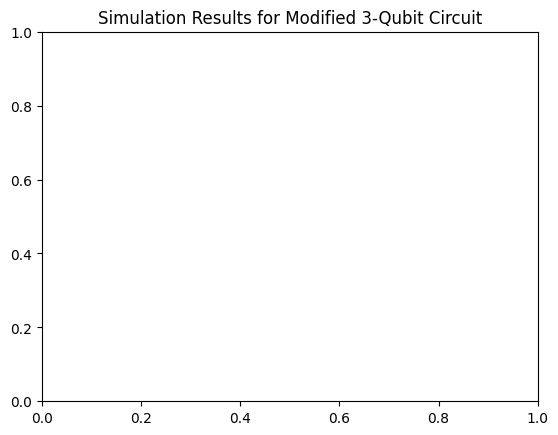

Measurement Counts: {'100': 68, '000': 437, '011': 457, '111': 62}


In [16]:
# TASK: Run the modified circuit and compare simulation results

simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=1024).result()
counts = result.get_counts()

plot_histogram(counts)
plt.title("Simulation Results for Modified 3-Qubit Circuit")
plt.show()

print("Measurement Counts:", counts)
